In [1]:
import os
from PIL import Image
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt

import preprocess as p
import architecture as arch
import display as  disp
import entrenamiento as en


In [2]:
data_dir = './dataset'
batch_size = 32
img_size = 64
learning_rate = 0.001
num_epochs = 20

#Architecture
out_1 = 64 
out_2 = 128 
out_3 = 256 
out_4 = 512 

#Hiperparams
ARCHT = ["3C", "4C", "B3C"]
LR = [0.001, 0.0001, 0.0002]
DA = ["NO", "DA"]


In [3]:
#Establecemos los parámetros
archt = ARCHT[2]
lr = LR[2]
da = DA[1]
print(f"{archt}_{lr}_{da}")

B3C_0.0002_DA


In [4]:
#Crear el train_loader y el validation_loader
if da == "NO":
    train_loader = p.get_train_loader(data_dir, batch_size=batch_size, img_size=img_size)
    validation_loader = p.get_validation_loader(data_dir, batch_size=batch_size, img_size=img_size)
    print("TrainLoader sin DA")
elif da == "DA":
    train_loader = p.get_train_loader_da(data_dir, batch_size=batch_size, img_size=img_size)
    validation_loader = p.get_validation_loader(data_dir, batch_size=batch_size, img_size=img_size)
    print("TrainLoader con DA")
else: 
    print("Error en la selección de data augmentation")

TrainLoader con DA


In [5]:
# Crear el modelo
if archt == "3C":
    model = arch.CNN_3C(out_1, out_2, out_3, img_size)
    print("Modelo de 3 capas convolucionales (3C)")
elif archt == "4C":
    model = arch.CNN_4C(out_1, out_2, out_3, out_4, img_size)
    print("Modelo de 4 capas convolucionales (4C)")
elif archt == "B3C":
    model = arch.CNN_B3C(out_1, out_2, out_3, img_size)
    print("Modelo de 3 bloques de 3 capas convolucionales (B3C)")
else:
    print("Error en la selección del modelo")


# Seleccionamos la GPU para el entrenamiento del modelo (Utilizar código de comprobaciones.ipynb para comprobar las gpus disponibles)
device = torch.device("cuda:0")  # Selecciona la GPU 0
print(f"Usando el dispositivo: [[{device}]]")

#Asignamos el modelo a la gpu 0
model = model.to(device)

Modelo de 3 bloques de 3 capas convolucionales (B3C)
Usando el dispositivo: [[cuda:0]]


In [6]:
#Creamos el nombre del modelo
model_name = disp.crear_nombre_modelo(archt, lr, da)
print(f"Nombre del modelo: {model_name}")

Nombre del modelo: 1_B3C_3_DA


[ENTRENAMIENTO]
Epoch [1/20] - Loss: 0.4285, Accuracy: 80.12%
[VALIDACIÓN]
Epoch [1/20] - Loss: 0.5558, Accuracy: 68.80% - Best
[ENTRENAMIENTO]
Epoch [2/20] - Loss: 0.2810, Accuracy: 88.71%
[VALIDACIÓN]
Epoch [2/20] - Loss: 0.7770, Accuracy: 62.81%
[ENTRENAMIENTO]
Epoch [3/20] - Loss: 0.2472, Accuracy: 90.27%
[VALIDACIÓN]
Epoch [3/20] - Loss: 0.9450, Accuracy: 58.09%
[ENTRENAMIENTO]
Epoch [4/20] - Loss: 0.2246, Accuracy: 91.33%
[VALIDACIÓN]
Epoch [4/20] - Loss: 0.5763, Accuracy: 65.97%
[ENTRENAMIENTO]
Epoch [5/20] - Loss: 0.2056, Accuracy: 92.08%
[VALIDACIÓN]
Epoch [5/20] - Loss: 0.6563, Accuracy: 61.40%
[ENTRENAMIENTO]
Epoch [6/20] - Loss: 0.1989, Accuracy: 92.38%
[VALIDACIÓN]
Epoch [6/20] - Loss: 0.5900, Accuracy: 68.86% - Best
[ENTRENAMIENTO]
Epoch [7/20] - Loss: 0.1868, Accuracy: 92.91%
[VALIDACIÓN]
Epoch [7/20] - Loss: 0.5829, Accuracy: 65.38%
[ENTRENAMIENTO]
Epoch [8/20] - Loss: 0.1782, Accuracy: 93.16%
[VALIDACIÓN]
Epoch [8/20] - Loss: 0.5304, Accuracy: 73.05% - Best
[ENTRENAMIE

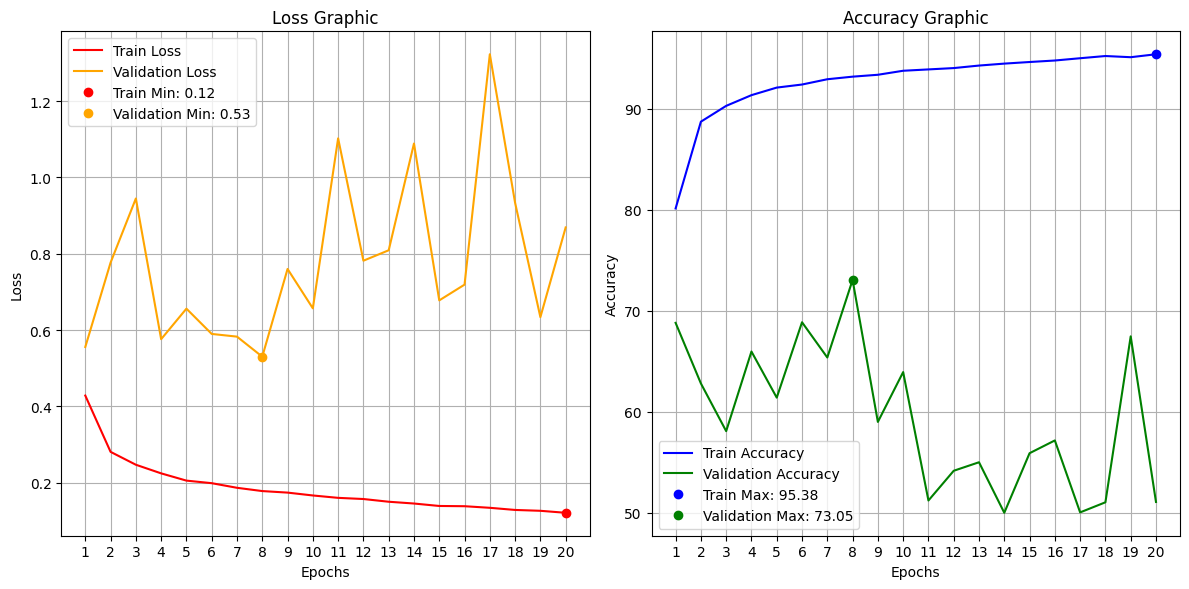

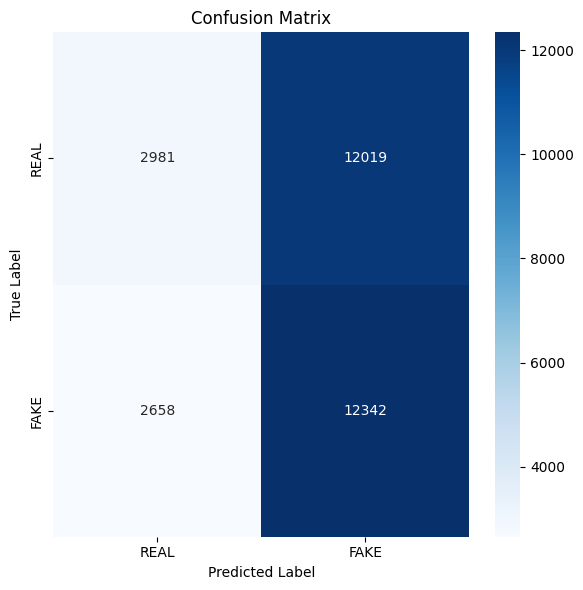

Matriz de Confusión:
 [[ 2981 12019]
 [ 2658 12342]]


In [7]:
#LLamamos a la función de entrenamiento con los parámetros seleccionados
en.entrenamiento_modelo(num_epochs, model, device, train_loader, validation_loader, lr, batch_size, img_size, model_name)